# Credit Card Fraud Detection

## Hyperparameter Tuning

In the Model Selection Stage multiple classification algorithms were tested. I employed more "classic" models as well as those that are often used for anomaly detection, which this problem could be framed as.

After some exploration the Random Forest and MLP showed good recall, which is the most important metric here, as I am trying to minimize False Negatives. This did come at the expense of some precision, but not much. Some algorithms had fewer False Negatives but a large number of False Positives. I did not choose them, as tuning toward even better recall, thus less False Negatives would have driven up the number of False Positives considerably.

The following steps are the result from the previous stages.

In [2]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn will be imported partially when necessary

#read in the data and make a copy of it in case anything goes wrong
path = "C:/Users/ms101/OneDrive/datasets"
credit_data = pd.read_csv(path + "/creditcard.csv")

data = credit_data.copy()

data.drop_duplicates(inplace = True)
data.reset_index(inplace = True, drop = True)
assert data.shape == (283726,31)#check if duplicates are removed correctly
data_red = data[["V17","V14","V12","V10","V16","V3","V7","V11","Class"]].copy()

In [2]:
data_red.to_csv(path + "/creditcard_reduced.csv")

In [3]:
X = data_red.drop("Class", axis = 1)
y = data_red["Class"]
assert X.shape == (283726,8)
assert y.shape == (283726,)

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(test_size = 0.2, random_state = 13)
for train_index, test_index in strat_split.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [5]:
# import the metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, precision_recall_curve


In [6]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

I will use a Randomized Search for good Hyperparameters as the search space is quite large and a Grid Search would take very long.

In [7]:
from sklearn.model_selection import RandomizedSearchCV

### Tuning the Random Forest Classifier

I will start with the Random Forest classifier.

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 13, n_jobs = -1) #use all cores for maximum performance

I will search the hyperparameter space for the (in many cases) most impactful hyperparameters: `n_estimators`, `max_features`,`max_depth`,`min_samples_split`,`min_samples_leaf`,`bootsrap`

In [9]:
#trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500], 'max_features': ['auto', None], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [10]:
forest_random_search = RandomizedSearchCV(forest_clf, random_grid, scoring = "recall",
                                          n_iter = 50, cv = 3, verbose = 2)

**Note: the following cell may take over one hour to run depending on the system**

I only ran it once.

In [23]:
forest_random_search.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=46, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=46, bootstrap=True, total=  23.5s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=46, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=46, bootstrap=True, total=  21.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=46, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=46, bootstrap=True, total=  23.5s
[CV] n_estimators=455, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=91, bootstrap=False 
[CV]  n_estimators=455, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=91, bootstrap=False, total= 2.3min
[CV] n_estimators=455, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=91, bootstrap=False 
[CV]  n_estimators=455, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=91, bootstrap=False, total= 2.1min
[CV] n_estimators=455, min_samples_split=10, min_samples_leaf=4, max_features=None, max_depth=91, bootstrap=False 
[CV]  n_estimators=455, mi

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=False, total=  35.9s
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=True, total= 1.2min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=True, total= 1.1min
[CV] n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=2, min_samples_leaf=1, max_features=None, max_depth=91, bootstrap=True, total= 1.3min
[CV] n_estimators=233, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=28, bootstrap=True 
[CV]  n_estimators=233, min_samples

[CV]  n_estimators=411, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=73, bootstrap=True, total= 1.4min
[CV] n_estimators=411, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=73, bootstrap=True 
[CV]  n_estimators=411, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=73, bootstrap=True, total= 1.2min
[CV] n_estimators=411, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=73, bootstrap=True 
[CV]  n_estimators=411, min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=73, bootstrap=True, total= 1.4min
[CV] n_estimators=322, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=91, bootstrap=True 
[CV]  n_estimators=322, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=91, bootstrap=True, total=  19.8s
[CV] n_estimators=322, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=91, bootstrap=True 
[CV]  n_estimators=322, min_samples_

[CV]  n_estimators=188, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=28, bootstrap=False, total=  17.0s
[CV] n_estimators=188, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=28, bootstrap=False 
[CV]  n_estimators=188, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=28, bootstrap=False, total=  18.7s
[CV] n_estimators=188, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=188, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=19, bootstrap=False, total=  17.8s
[CV] n_estimators=188, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=188, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=19, bootstrap=False, total=  17.3s
[CV] n_estimators=188, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=19, bootstrap=False 
[CV]  n_estimators=188,

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=19, bootstrap=False, total=   9.8s
[CV] n_estimators=322, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=46, bootstrap=True 
[CV]  n_estimators=322, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=46, bootstrap=True, total=  19.7s
[CV] n_estimators=322, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=46, bootstrap=True 
[CV]  n_estimators=322, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=46, bootstrap=True, total=  19.2s
[CV] n_estimators=322, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=46, bootstrap=True 
[CV]  n_estimators=322, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=46, bootstrap=True, total=  21.4s
[CV] n_estimators=455, min_samples_split=10, min_samples_leaf=1, max_features=None, max_depth=100, bootstrap=True 
[CV]  n_estimators=455, min_sampl

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 118.2min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   scoring='recall', verbose=2)




Let's see what parameters did best:

In [11]:
#forest_random_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [35]:
forest_clf = forest_random_search.best_estimator_

{'n_estimators': 233,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 82,
 'bootstrap': False}

In [36]:
forest_clf.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 82,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 233,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}

In [37]:
forest_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=False, max_depth=82, min_samples_split=10,
                       n_estimators=233, n_jobs=-1, random_state=13)

I am now testing how well the tuned Random Forest Classifier does. The results from the "default" Random Forest Classifier can be found below for reference.

In [12]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True) 

In [13]:
from sklearn.model_selection import cross_val_predict

In [17]:
y_pred_forest = cross_val_predict(forest_clf,X_train_scaled, y_train)

**Note: I realize that the code below was repeated quite often during my exploration and tuning. I decided to keep the original code here but created a function in a seperate .py script for later use.**

Accuracy:  0.9995374041765794
Precision:  0.9174311926605505
Recall:  0.7936507936507936
TN       FP
[[226575     27]
 [    78    300]]
FN       TP


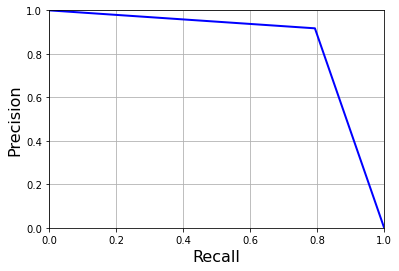

<Figure size 576x288 with 0 Axes>

In [18]:
print("Accuracy: ", accuracy_score(y_train, y_pred_forest))
print("Precision: ", precision_score(y_train,y_pred_forest))
print("Recall: ", recall_score(y_train,y_pred_forest))
print("TN       FP")
print(confusion_matrix(y_train,y_pred_forest)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred_forest)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

**OLD default Model**

Random Forest

- Precision:  0.9283489096573209
- Recall:  0.7883597883597884

      TN       FP

      [[226579     23]

      [    80    298]]
 
      FN       TP


Unfortunately the tuned RandomForest is not much better than the "default" one. It basically traded a slight increase in recall for a slight decrease in precision.

### Tuning the MLP Classifier

The MLP performed only slightly worse than the Random Forest in the previous exploration. It's worth exploring it a little further.

In [14]:
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier()

In [15]:
alpha = [float(x) for x in np.linspace(0.00005, 0.05, num = 5)]
random_grid_MLP = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': alpha,
    'learning_rate': ['constant','adaptive'],
}

print(random_grid_MLP)

{'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [5e-05, 0.0125375, 0.025025000000000002, 0.037512500000000004, 0.05], 'learning_rate': ['constant', 'adaptive']}


In [16]:
MLP_random_search = RandomizedSearchCV(MLP_clf, random_grid_MLP,scoring = "recall",
                                          n_iter = 50, cv = 3, n_jobs = -1, verbose = 2)

**Note: the following cell may take over one hour to run depending on the system**

I only ran it once.

In [52]:
MLP_random_search.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 14.0min finished


RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [5e-05, 0.0125375,
                                                  0.025025000000000002,
                                                  0.037512500000000004, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   scoring='recall', verbose=2)

In [53]:
MLP_random_search.best_params_

{'solver': 'adam',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50, 100, 50),
 'alpha': 0.0125375,
 'activation': 'relu'}

In [55]:
MLP_clf = MLP_random_search.best_estimator_

In [56]:
MLP_clf.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.0125375, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

In [19]:
y_pred_MLP = cross_val_predict(MLP_clf,X_train_scaled, y_train)

Accuracy:  0.9994096396158252
Precision:  0.8426966292134831
Recall:  0.7936507936507936
TN       FP
[[226546     56]
 [    78    300]]
FN       TP


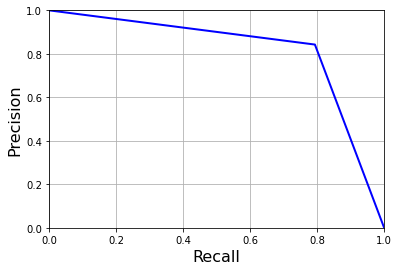

<Figure size 576x288 with 0 Axes>

In [20]:
print("Accuracy: ", accuracy_score(y_train,y_pred_MLP))
print("Precision: ", precision_score(y_train,y_pred_MLP))
print("Recall: ", recall_score(y_train,y_pred_MLP))
print("TN       FP")
print(confusion_matrix(y_train,y_pred_MLP)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred_MLP)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

**OLD default MLP**
- Precision:  0.8605341246290801
- Recall:  0.7671957671957672

        TN       FP
       [[226555     47]
       [    88    290]]
        FN       TP

The tuned MLP gained some recall while losing some precision (as expected), yet the gains are not very large and it still lags behind the Random Forest.

### Trying an Ensemble

Ensembles often perform better than individual classifiers, so it is worth a try here. I am using a Voting Ensemble with hard voting.

In [59]:
from sklearn.ensemble import VotingClassifier

ensemble_clf = VotingClassifier([("RF",forest_clf),("MLP", MLP_clf)], n_jobs = -1)

In [60]:
ensemble_clf.fit(X_train_scaled,y_train)
y_pred_ensemble = cross_val_predict(ensemble_clf,X_train_scaled, y_train)

Precision:  0.9288025889967637
Recall:  0.7592592592592593
TN       FP
[[226580     22]
 [    91    287]]
FN       TP


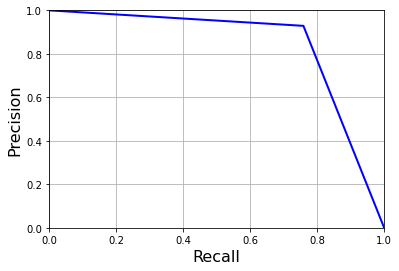

<Figure size 576x288 with 0 Axes>

In [61]:
print("Precision: ", precision_score(y_train,y_pred_ensemble))
print("Recall: ", recall_score(y_train,y_pred_ensemble))
print("TN       FP")
print(confusion_matrix(y_train,y_pred_ensemble)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred_ensemble)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

The Voting Classifier ensemble shows **worse performance** than the individual classifiers. It will therefore not be discarded as a choice for the final model.

In [18]:
import pickle
path = "C:/Users/ms101/OneDrive/DataScience_ML/projects/Credit card fraud detection/models"

In [63]:
#saving all current models to get later
pickle.dump(forest_clf,open(path + "/forest_model.pickle", "wb"))
pickle.dump(MLP_clf,open(path + "/MLP_model.pickle", "wb"))

To avoid the long time the Randomized Search takes every time it is run and to keep things consistent I am saving the model and working with the versions presented up to this point.

In [19]:
forest_clf = pickle.load(open(path+ "/forest_model.pickle", "rb"))
MLP_clf = pickle.load(open(path + "/MLP_model.pickle", "rb"))

In [20]:
forest_clf.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 82,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 233,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}

In [21]:
MLP_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0125375,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Using `predict_proba()` and a manual threshold to controll recall/precision trade-off

Another option to tune a model towards a higher performance in a metric is to use `predict_proba()` to predict the probability of an instance to belong to the target class instead of a direct prediction. 

By manually setting a probability threshold used to determine the target class we can control the recall-precision tradeoff.

In [22]:
y_proba_forest = forest_clf.predict_proba(X_train_scaled)
y_proba_MLP = MLP_clf.predict_proba(X_train_scaled)

The following function was taken from [this Kaggle kernel](https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now), please note that this kernel achieves a relatively high recall but suffers from data-leakage.

In [23]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  0.9947089947089947
Recall metric in the training dataset:  0.9841269841269841
Recall metric in the training dataset:  0.9523809523809523
Recall metric in the training dataset:  0.873015873015873
Recall metric in the training dataset:  0.7328042328042328


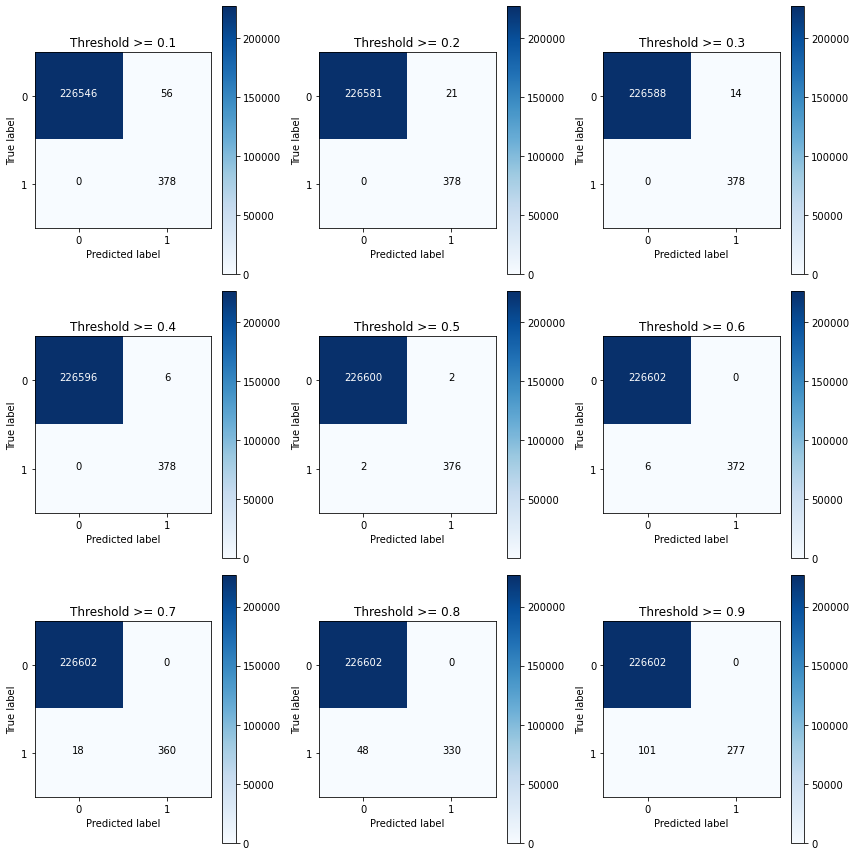

In [24]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(12,12))
j = 1
for i in thresholds:
    y_train_predictions_high_recall = y_proba_forest[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_train,y_train_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the training dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Recall metric in the training dataset:  0.8412698412698413
Recall metric in the training dataset:  0.8306878306878307
Recall metric in the training dataset:  0.8068783068783069
Recall metric in the training dataset:  0.7936507936507936
Recall metric in the training dataset:  0.7804232804232805
Recall metric in the training dataset:  0.7380952380952381
Recall metric in the training dataset:  0.5952380952380952
Recall metric in the training dataset:  0.21957671957671956
Recall metric in the training dataset:  0.0


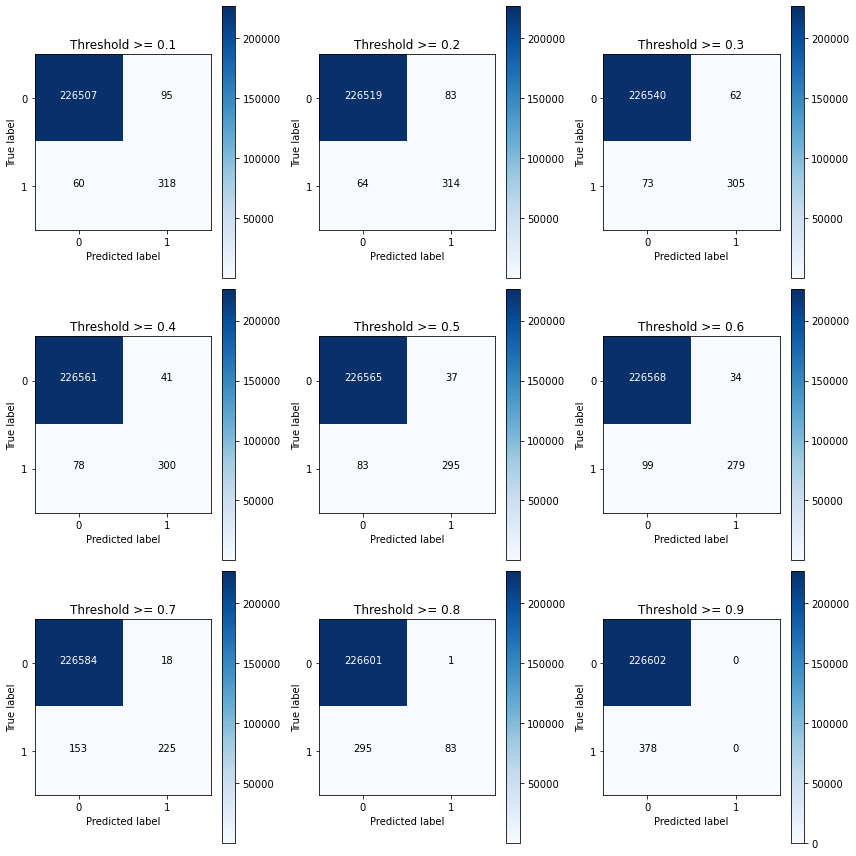

In [25]:
plt.figure(figsize=(12,12))
j = 1
for i in thresholds:
    y_train_predictions_high_recall = y_proba_MLP[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_train,y_train_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the training dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

The Random Forest seems to do extremely well with certain thresholds while the MLP does not seem to get much better than the direct predictions. I will therefore continue without the MLP.

The Random Forest looks a little too good to be true right now. There are certain thresholds with very few misclassifications. It is important to consider the possibility of overfitting here.
I will go with a threshold of 0.1, even though it has more False positives (but still an acceptable number) and because the 0.2 - 0.4 thresholds are probably overfitting. Let's look at the precision-recall-curve again

In [26]:
threshold = 0.1
y_train_predictions_high_recall = y_proba_forest[:,1] > threshold

Precision:  0.8709677419354839
Recall:  1.0
TN       FP
[[226546     56]
 [     0    378]]
FN       TP


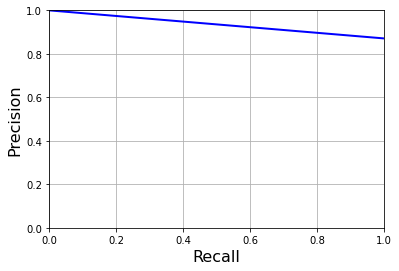

<Figure size 576x288 with 0 Axes>

In [27]:
print("Precision: ", precision_score(y_train,y_train_predictions_high_recall))
print("Recall: ", recall_score(y_train,y_train_predictions_high_recall))
print("TN       FP")
print(confusion_matrix(y_train,y_train_predictions_high_recall)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_train,y_train_predictions_high_recall)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

This looks very promising. The recall is 1 and the precision is still acceptable, however we may have overfit the training data.

In [28]:
y_test_proba = forest_clf.predict_proba(X_test_scaled)
threshold = 0.1
y_test_predictions_high_recall = y_test_proba[:,1] > threshold

Precision:  0.7450980392156863
Recall:  0.8
TN       FP
[[56625    26]
 [   19    76]]
FN       TP


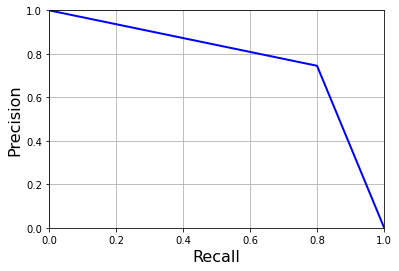

<Figure size 576x288 with 0 Axes>

In [29]:
print("Precision: ", precision_score(y_test,y_test_predictions_high_recall))
print("Recall: ", recall_score(y_test,y_test_predictions_high_recall))
print("TN       FP")
print(confusion_matrix(y_test,y_test_predictions_high_recall)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_test,y_test_predictions_high_recall)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

In [30]:
y_test_preds_forest = forest_clf.predict(X_test_scaled)

Precision:  0.9324324324324325
Recall:  0.7263157894736842
TN       FP
[[56646     5]
 [   26    69]]
FN       TP


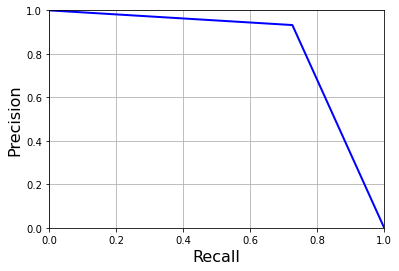

<Figure size 576x288 with 0 Axes>

In [31]:
print("Precision: ", precision_score(y_test,y_test_preds_forest))
print("Recall: ", recall_score(y_test,y_test_preds_forest))
print("TN       FP")
print(confusion_matrix(y_test,y_test_preds_forest)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_test,y_test_preds_forest)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

The recall score is only marginally better than before for the training set and not very good for the test set. The promising metrics from the training seem to be the result of overfitting unfortunately.


### Undersampling

Another option to deal with the skewed data is undersampling. This technique uses the size of the minority class and samples an equal amount of majority class instances. The data is thus not skewed anymore and classifiers may do better. However, this technique also has a tendency to lead to overfitting.

In [32]:
# make sure to only use X_train so we can evaluate on X_test (which was created before) and avoid data leakage
df = X_train
df["Class"] = y_train

In [33]:
df

V17       V14       V12       V10       V16        V3        V7  \
3160    0.397299  0.269613  0.680659 -1.738615 -1.189251  0.829225  1.315697   
194542  1.291653 -1.891771 -0.726762  0.052069  1.602776 -2.637005 -1.398023   
272084  0.143411 -1.066011 -0.283090 -0.838521  0.504830 -0.658717  0.980877   
233288 -0.438784 -0.804786 -0.893832  1.257360  1.763071  0.221852  0.576684   
247730 -0.573604 -0.738563  1.513080  0.085423  0.289837  0.787402 -1.308973   
...          ...       ...       ...       ...       ...       ...       ...   
163188  0.769769 -1.414708  0.531363  1.257493 -0.388035  3.159653 -1.173586   
235356 -0.309833 -1.327047 -0.393457  1.027555  0.115883  1.934733 -0.283306   
211869 -0.518454  0.130844  0.303349  0.587720 -1.145332 -1.133517 -0.968908   
241988 -0.324077  0.893821 -0.672186 -0.128962 -0.589789 -0.586051  1.951022   
115686 -1.049190  0.373893  0.114834  0.001812  0.705083 -0.873697 -0.599178   

             V11  Class  
3160    0.971364      0  
194542  0.434147      0  
272084 -1.217770      0  
233288  0.217661      0  
247730  0.344514      0  
...          ...    ...  
163188 -1.891243      0  
235356 -0.411079      0  
211869  0.049076      0  
241988 -1.100702      0  
115686 -0.103692      0  

[226980 rows x 9 columns]

In [34]:
frauds_count = len(df[df["Class"] == 1])
frauds_idx = np.array(df[df["Class"] == 1].index)
normal_idx = np.array(df[df["Class"] == 0].index)

In [35]:
# select as many normal instances as there are fraud instances
normal_idx_random = np.random.choice(normal_idx,frauds_count, replace = False)

In [36]:
under_sample_idx = np.concatenate([frauds_idx,normal_idx_random])
data_undersample = df.loc[under_sample_idx,:]
X_undersample = data_undersample.drop("Class", axis = 1)
y_undersample = data_undersample["Class"]

We now should have an equal amount of instances per class :

In [37]:
y_undersample.value_counts()

1    378
0    378
Name: Class, dtype: int64

In [38]:
#splitting the undersampled data
strat_split = StratifiedShuffleSplit(test_size = 0.2, random_state = 13)
for train_index, test_index in strat_split.split(X_undersample,y_undersample):
    X_train_u, X_test_u = X_undersample.iloc[train_index], X_undersample.iloc[test_index]
    y_train_u, y_test_u = y_undersample.iloc[train_index], y_undersample.iloc[test_index]

In [39]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_u = scaler.fit_transform(X_train_u)
X_test_scaled_u = scaler.transform(X_test_u)

In [40]:
forest_clf.fit(X_train_scaled_u,y_train_u)
y_pred_forest = cross_val_predict(forest_clf,X_train_scaled_u,y_train_u)

Lets see how well the classifier does on the undersampled data

Accuracy:  0.9288079470198676
Precision:  0.9575971731448764
Recall:  0.8973509933774835
TN       FP
[[290  12]
 [ 31 271]]
FN       TP


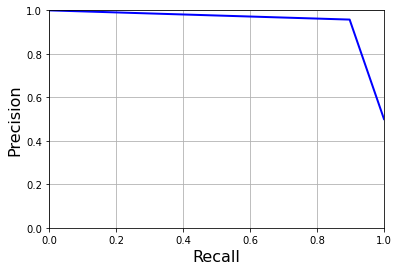

<Figure size 576x288 with 0 Axes>

In [41]:
print("Accuracy: ", accuracy_score(y_train_u, y_pred_forest))
print("Precision: ", precision_score(y_train_u,y_pred_forest))
print("Recall: ", recall_score(y_train_u,y_pred_forest))
print("TN       FP")
print(confusion_matrix(y_train_u,y_pred_forest)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_train_u,y_pred_forest)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

Not bad, a recall of about .90 and a precision of .957 are certainly very good. So far this method leads to better results than using the full data.

Lets see if we can use the manual thresholding again to get even better performance:

In [42]:
y_proba_forest = forest_clf.predict_proba(X_train_scaled_u)

Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  1.0
Recall metric in the training dataset:  0.9966887417218543
Recall metric in the training dataset:  0.9701986754966887
Recall metric in the training dataset:  0.9304635761589404
Recall metric in the training dataset:  0.9006622516556292
Recall metric in the training dataset:  0.8576158940397351


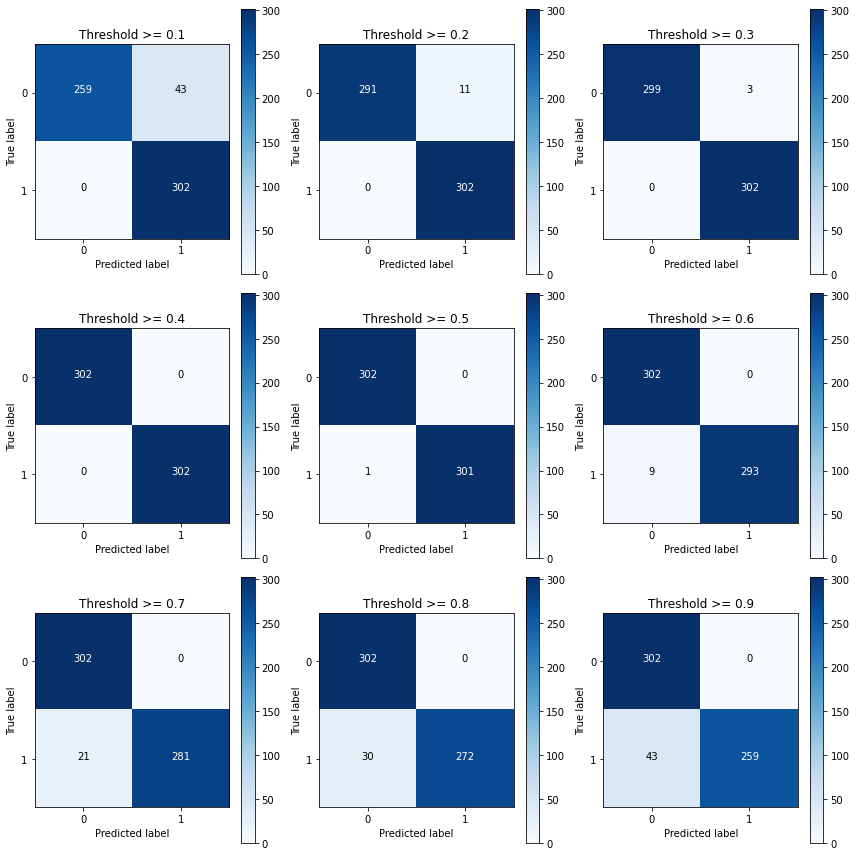

In [43]:

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(12,12))
j = 1
for i in thresholds:
    y_train_predictions_high_recall = y_proba_forest[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_train_u,y_train_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the training dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    
    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

This looks promising, however choosing the best threshold while avoiding overfitting is very hard again.

Time to look at the undersampled test data.

In [44]:
y_test_proba = forest_clf.predict_proba(X_test_scaled_u)
threshold = 0.2 #hard to say which one to pick
y_test_predictions_high_recall = y_test_proba[:,1] > threshold

Precision:  0.8888888888888888
Recall:  0.9473684210526315
TN       FP
[[67  9]
 [ 4 72]]
FN       TP


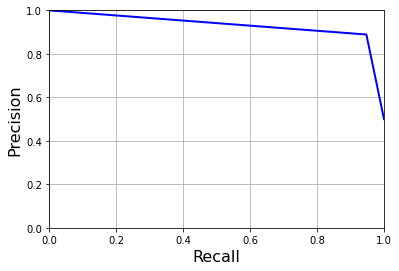

<Figure size 576x288 with 0 Axes>

In [45]:
print("Precision: ", precision_score(y_test_u,y_test_predictions_high_recall))
print("Recall: ", recall_score(y_test_u,y_test_predictions_high_recall))
print("TN       FP")
print(confusion_matrix(y_test_u,y_test_predictions_high_recall)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_test_u,y_test_predictions_high_recall)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

This again looks promising. However guessing at what the best threshold is, does not seem like a very good strategy. As the normal predictions also did a very good job I will use them to evaluate our undersampling model on the real test set. Remember this was split of before any undersampling to avoid data leakage, it does not contain an equal amount of instances per target class.

In [46]:
#testing the clf on the full test dataset
y_test_pred_forest = forest_clf.predict(X_test)

Accuracy:  0.05857681598702992
Precision:  0.0017565168644305335
Recall:  0.9894736842105263
TN       FP
[[ 3230 53421]
 [    1    94]]
FN       TP


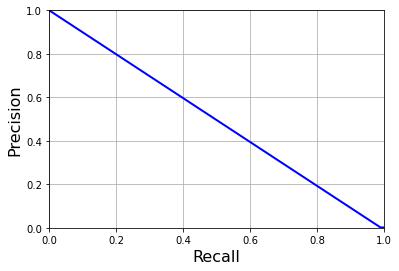

<Figure size 576x288 with 0 Axes>

In [47]:
print("Accuracy: ", accuracy_score(y_test, y_test_pred_forest))
print("Precision: ", precision_score(y_test,y_test_pred_forest))
print("Recall: ", recall_score(y_test,y_test_pred_forest))
print("TN       FP")
print(confusion_matrix(y_test,y_test_pred_forest)) 
print("FN       TP")
precisions, recalls, thresholds = precision_recall_curve(y_test,y_test_pred_forest)
plot_precision_vs_recall(precisions,recalls) #plot precision recall curve
plt.figure(figsize=(8,4))
plt.show()

The undersampling led to massiv overfitting.

The Recall is as high as it can be, yet the precision is basically non existent. Our classifier just flagged most cases as fraud which is obviously not a viable strategy in any real-life context.

The Random Forest created earlier will thus stay the choice for an algorithm with decent Recall and high precision.

### Conclusion

Depending on the business context and factors such as "cost per false positive" a model with less FN and more FP could be preferred. In this case the Isolation Forest from the model exploration may be a viable choice, as it did have about half the FN of the Random Forest but many more false positives.

Going from my personal understanding, that although undected fraud is certainly the bigger problem a lot of "false alarms" are also frustrating for customers and thus bad for business I am choosing the Random Forest Classifier trained on the skewed data as my final model.